In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from stock_market_fluctuations import site_percolation_cluster_distribution, cont_bouchand_model
from scipy.stats import norm

In [68]:
def cluster_size_distribution(s,p):
    return s**(-187/91) * (np.e**(s/(0.59274621 - p)**(-36/91)))

In [69]:
L = 200 # We use L x L grid.
nodes = [(i,j) for i in range(L - 1) for j in range(L - 1)]
edges = [((i,j),(i+1,j)) for i in range(L - 1) for j in range(L)] # Horizontal edeges
edges = edges + [((i,j),(i,j+1)) for i in range(L) for j in range(L - 1)] # Vertical edges
T = 20000 # Number of timesteps.
bins = 75 # For histograms.

In [70]:
p = 0.55
clusters = []
for i in tqdm(range(T)):
    clusters.append(site_percolation_cluster_distribution(nodes, edges, p))

100%|██████████| 20000/20000 [11:00<00:00, 30.26it/s]


In [71]:
pa = 0.99
pb = 0.5
cont_bouchand_price_changes1 = []
for i in tqdm(range(T)):
    price_change = cont_bouchand_model(clusters[i], pa, pb)
    cont_bouchand_price_changes1.append(price_change)

100%|██████████| 20000/20000 [00:02<00:00, 9343.27it/s]


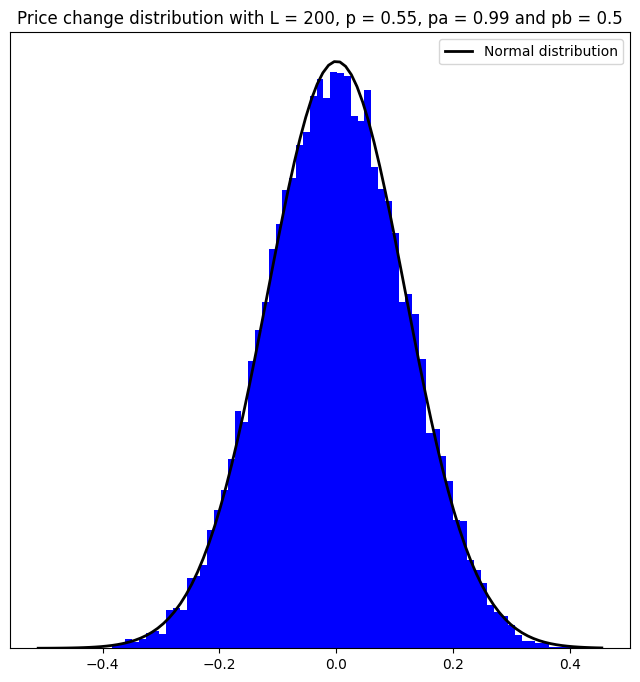

In [72]:
plt.figure(figsize=(8, 8))
plt.yticks([])
plt.gca().yaxis.set_visible(False)
plt.title(f'Price change distribution with L = {L}, p = {p}, pa = {pa} and pb = {pb}')
plt.hist(cont_bouchand_price_changes1, bins = bins, color = 'blue', density = True)
(mu, sigma) = norm.fit(cont_bouchand_price_changes1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth = 2, label = 'Normal distribution')
plt.legend()
plt.savefig('cont_bouchand_large_pa.pdf')
plt.show()

In [73]:
pa = 0.01
pb = 0.5
cont_bouchand_price_changes1 = []
for i in tqdm(range(T)):
    price_change = cont_bouchand_model(clusters[i], pa, pb)
    cont_bouchand_price_changes1.append(price_change)

100%|██████████| 20000/20000 [00:01<00:00, 14053.28it/s]


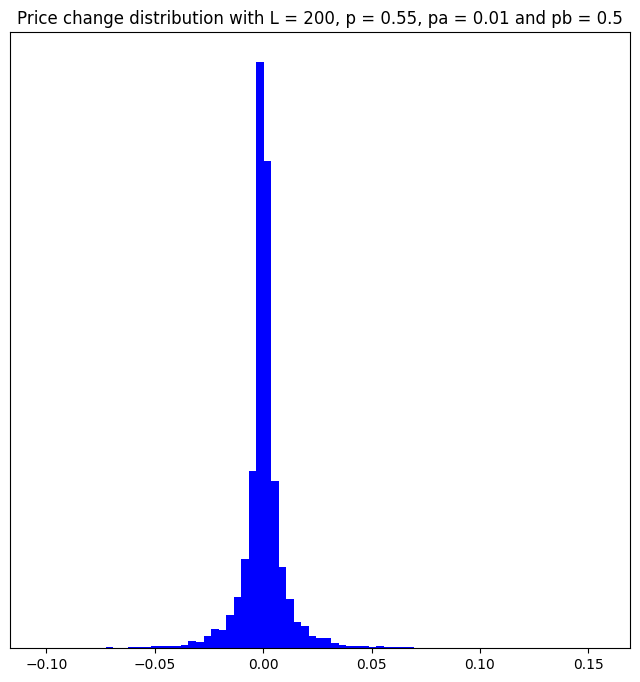

In [74]:
plt.figure(figsize=(8, 8))
plt.yticks([])
plt.gca().yaxis.set_visible(False)
plt.title(f'Price change distribution with L = {L}, p = {p}, pa = {pa} and pb = {pb}')
plt.hist(cont_bouchand_price_changes2, bins = bins, color = 'blue', density = True)
plt.savefig('cont_bouchand_small_pa.pdf')
plt.show()

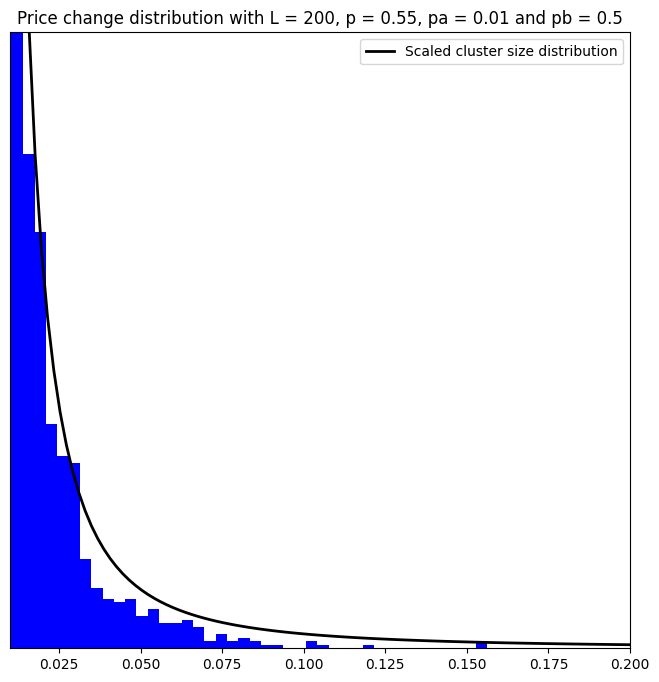

In [75]:
plt.figure(figsize=(8, 8))
plt.yticks([])
plt.gca().yaxis.set_visible(False)
plt.xlim(left = 0.01, right = 0.2)
plt.ylim(top = 5)
plt.title(f'Price change distribution with L = {L}, p = {p}, pa = {pa} and pb = {pb}')
plt.hist(cont_bouchand_price_changes2, bins = bins, color = 'blue', density = True)
_, xmax = plt.xlim()
x = np.linspace(0.01, xmax, 100)
pdf = cluster_size_distribution(x, p) / 1000
plt.plot(x, pdf, 'k', linewidth = 2, label = 'Scaled cluster size distribution')
plt.legend()
plt.savefig('cont_bouchand_small_pa_right_tail.pdf')
plt.show()